In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('Data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', 200)
df = pd.read_csv('Data/GroceryDataset.csv')
df.shape

(1757, 8)

In [4]:
df.columns

Index(['Sub Category', 'Price', 'Discount', 'Rating', 'Title', 'Currency',
       'Feature', 'Product Description'],
      dtype='object')

In [5]:
df.isna().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
display(df)

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [18]:
df.dtypes

Sub Category            object
Price                  float64
Discount                object
Rating                  object
Title                   object
Currency                object
Feature                 object
Product Description     object
dtype: object

In [19]:
df['Sub Category'].unique()

array(['Bakery & Desserts', 'Beverages & Water', 'Breakfast', 'Candy',
       'Cleaning Supplies', 'Coffee', 'Deli', 'Floral', 'Gift Baskets',
       'Household', 'Kirkland Signature Grocery',
       'Laundry Detergent & Supplies', 'Meat & Seafood', 'Organic',
       'Pantry & Dry Goods', 'Paper & Plastic Products', 'Poultry',
       'Seafood', 'Snacks'], dtype=object)

In [20]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(r'through-\d+\.\d+', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

C:\Users\shimu\AppData\Local\Temp\ipykernel_7576\3518138973.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [21]:
df.dtypes

Sub Category            object
Price                  float64
Discount                object
Rating                  object
Title                   object
Currency                object
Feature                 object
Product Description     object
dtype: object

In [22]:
df_analysis = df[['Sub Category', 'Price', 'Currency']].dropna()
display(df_analysis)

,Sub Category,Price,Currency
0,Bakery & Desserts,56.99,$
1,Bakery & Desserts,159.99,$
2,Bakery & Desserts,44.99,$
3,Bakery & Desserts,39.99,$
4,Bakery & Desserts,59.99,$
...,...,...,...
1752,Snacks,23.99,$
1753,Snacks,49.99,$
1754,Snacks,22.99,$
1755,Snacks,17.49,$


In [23]:
df_analysis['Currency'].unique()

array(['$'], dtype=object)

In [24]:
df_analysis.isna().sum()

Sub Category    0
Price           0
Currency        0
dtype: int64

In [25]:
df_agrup_sum = df_analysis.groupby('Sub Category')['Price'].sum()
display(df_agrup_sum)

Sub Category
Bakery & Desserts                2752.67
Beverages & Water                5432.12
Breakfast                         279.39
Candy                            3841.67
Cleaning Supplies                2853.56
Coffee                           3123.65
Deli                             7784.79
Floral                           5398.25
Gift Baskets                    10568.11
Household                        2295.19
Kirkland Signature Grocery       3430.58
Laundry Detergent & Supplies     1321.91
Meat & Seafood                  32828.55
Organic                           739.87
Pantry & Dry Goods               4976.69
Paper & Plastic Products         2156.76
Poultry                          1279.92
Seafood                          9189.51
Snacks                           6288.48
Name: Price, dtype: float64

In [26]:
df_agrup_mean = df_analysis.groupby('Sub Category')['Price'].mean()
display(df_agrup_mean)

Sub Category
Bakery & Desserts                83.414242
Beverages & Water                36.703514
Breakfast                        13.304286
Candy                            25.108954
Cleaning Supplies                30.357021
Coffee                           32.880526
Deli                            370.704286
Floral                           71.976667
Gift Baskets                    118.742809
Household                        28.335679
Kirkland Signature Grocery       28.119508
Laundry Detergent & Supplies     33.895128
Meat & Seafood                  229.570280
Organic                          22.420303
Pantry & Dry Goods               29.103450
Paper & Plastic Products         25.675714
Poultry                         159.990000
Seafood                         195.521489
Snacks                           21.535890
Name: Price, dtype: float64

In [27]:
df_agrup_mean = df_agrup_mean.reset_index()

C:\Users\shimu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

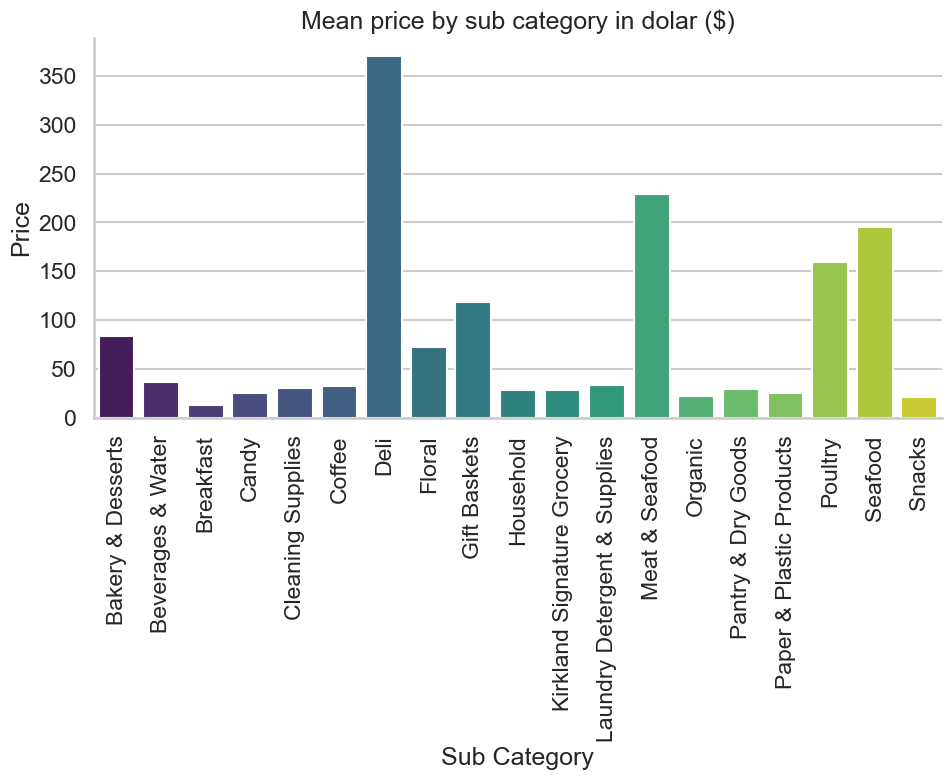

In [28]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", context="talk")
sns.catplot(kind='bar',
            data=df_agrup_mean,
            x='Sub Category',
             y='Price', 
             palette='viridis',
             aspect=2)

plt.xticks(rotation=90)
plt.title('Mean price by sub category in dolar ($)')
plt.show()